# 02. 의사결정 트리와 앙상블
> 트리기반 모델인 의사결정 트리 알고리즘와 앙상블 메커니즘을 배워보고 실습을 진행해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 5]
- permalink: /decision_tree_ensemble
- exec: colab

<br>

### 1. 트리란?

의사결정 트리는 트리기반의 머신러닝 모델입니다. 그러나 컴퓨터 사이언스를 배우지 않은 여러분은 '트리'라는 자료구조를 잘 모르실테니 우선 '트리'에 대해 먼저 설명드리겠습니다.
<br><br>

![](https://s3.ap-northeast-2.amazonaws.com/learn.codestate.com/sos/Data+Structure/Advanced%20Data%20Structures/Untitled%204.png)

트리는 '노드'로 구성된 계층적 자료구조입니다. '노드'는 위 그림에 있는 동그라미에 해당하는데, 트리의 기본 요소를 의미합니다. 트리에는 루트(최상위 노드)가 존재하고, 루트에서부터 시작해서 자식노드들이 아래로 뻗어나가게 됩니다. 그리고 가장 마지막에 위치한 노드를 리프노트(잎사귀 노드)라고 합니다. <br><br>

각 노드는 여러개의 자식노드를 가질 수 있는데, 최대 N개까지만 가질 수 있는 트리를 N진 트리라고 합니다. 예를 들어 위 그림처럼 각 노드가 최대 2개의 자식노드를 가질 수 있으면 그런 트리를 이진트리라고 합니다. 모양이 꼭 뒤집어 놓은 나무같다고 해서 '트리'라고 부른다고 합니다.<br><br>




### 2. 의사결정 트리 알고리즘이란?

![](https://i2.wp.com/hleecaster.com/wp-content/uploads/2020/01/dct01.png?resize=1536%2C802)

의사결정 트리 알고리즘은 트리 구조를 이용한 매우 직관적인  머신러닝 모델로, 분류와 회귀가 모두 가능한 지도학습 모델입니다. 아래의 예시를 봅시다. <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/01.jpg?raw=true)

만약 여러분에게 겨울에 찍은 가족 사진을 분류해볼래? 라고 말한다면 여러분은 어떤 기준으로 이미지를 분류해내실 건가요? <br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/02.jpg?raw=true)

가장 먼저 '사진'을 찾아달라고 했기 때문에, '사진'이 아닌 '그림(만화)'를 걸러낼 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/03.jpg?raw=true)

그리고 나서 위 처럼 '겨울'사진이 아닌 사진을 걸러낼 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/04.jpg?raw=true)

마지막으로 사진에 여러명의 사람들이 있는 저 한 장의 사진을 겨울 가족 사진일 것이라고 분류해낼 수 있습니다. 의사결정 트리는 이렇게 여러개의 질문으로 데이터를 분리해내는 방법이고, 각 질문마다 데이터가 나뉘게 됩니다. 매우 직관적이죠? 학습시에는 이런 트리구조를 생성해서 파일로 저장하고, 테스트시에는 저장된 파일을 불러와서 사용하게 됩니다.
<br><br>

### 3. ID3 알고리즘 : 의사결정 트리의 학습 알고리즘

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/05.jpg?raw=true)

그렇다면 이러한 의사결정 트리는 어떻게 학습될까요? 우선 위의 예제를 그대로 사용해봅시다. 아래와 같은 학습데이터가 있습니다. 우리는 3차원 데이터를 사용하였습니다. (이미지 데이터가 아닙니다) 우선 (1. 사진인지 만화인지), (2. 겨울사진인지 아닌지), (3. 사람이 여러명인지 한명인지)의 속성을 가지고 있고, 정답열(라벨)로 우리가 찾던 겨울 가족사진인지 아닌지에 대한 여부가 기록되어있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/06.jpg?raw=true)

컴퓨터는 각 속성(열)을 질문처럼 만들어서 맞는 경우 오른쪽으로, 틀리는 경우 왼쪽으로 보내는 트리를 만들어냅니다. 매우 간단하죠? 그런데 속성(열)이 총 3개 있으니 질문의 순서에 따라 위 처럼 다양한 종류의 트리가 만들어질 수 있습니다. 때문에 이 질문의 순서를 정하는 일이 중요해보입니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/07.jpg?raw=true)

질문이 효율적이려면, 하나의 질문에서 많은 오답데이터를 걸러낼 수 있어야합니다. 위를 보면 (1. 사진인지 만화인지)는 총 4장의 오답을 걸러내서, 다음번부터는 4장만 확인하면 됩니다. 그에 비해 나머지 두개의 질문은 3장의 오답을 걸러내서, 다음번에 5장의 사진을 분류해야합니다. 따라서 (1. 사진인지 만화인지)가 가장 좋은 질문이라고 할 수 있습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/08.jpg?raw=true)

그 다음에 2개의 질문 중 어떤 질문이 먼저일지 골라야합니다. (2. 겨울사진인지 아닌지)는 1장의 사진을 걸러내서 다음번에 4장의 이미지를 분류해야합니다. 그에 비해 (3. 사람이 여러명인지 한명인지)는 2장의 사진을 걸러내서 다음 번에 3장의 사진을 분류해야합니다. 따라서 (3. 사람이 여러명인지 한명인지)가 더 좋은 질문이라고 할 수 있습니다.<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/09.jpg?raw=true)

마지막으로 (2. 겨울사진인지 아닌지)를 이용해 최종적인 분류를 마치게 됩니다. 이렇게 의사결정 트리를 구현할 수 있습니다. 그렇다면 이러한 순서는 어떻게 기계적으로 구현할 수 있을까요? 우리는 여기서 정보이론 시간에 배운 엔트로피(Entropy)를 사용합니다.

<br>

### 4. ID3 알고리즘의 수학적 이해

ID3 알고리즘은 실제로 구현할 때 정보이론의 엔트로피를 계산하여 구현합니다. 엔트로피를 다시 리마인드 해봅시다. 

<br>
$$
H(x) =  \sum_{i} -P_i \cdot \log P_i
$$
<br>

엔트로피는 위의 공식으로 구할 수 있습니다. 이전에 설명했다시피, $-\log P_i$들의 기댓값을 구한 것이 엔트로피라고 설명했습니다. 그러면 예시 상황의 엔트로피를 구해봅시다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/10.jpg?raw=true)

총 8장의 사진 중 겨울 가족사진(Yes)가 나올 확률은 $\frac{1}{8}$로 엔트로피는 $H(Yes) = -\frac{1}{8} \cdot \log \frac{1}{8}$입니다. 그리고 겨울 가족사진이 아닌 사진(No)가 나올 확률은 $\frac{7}{8}$로 엔트로피는 $H(No) = -\frac{7}{8} \cdot \log \frac{7}{8}$입니다. 따라서 $\sum Entropy = -\frac{1}{8} \cdot \log \frac{1}{8} -\frac{7}{8} \cdot \log \frac{7}{8}$로 0.543이 됩니다. 엔트로피를 구했으니, 이제 정보 획득량 (Information Gain)을 구해봅시다.
<br><br>

정보 획득량 (Information Gain)은 이전 엔트로피에서 어떠한 정보를 얻었을 때, 얼마나 엔트로피가 많이 감소하는지를 의미합니다. 수식으로 나타내면, 아래처럼 나타낼 수 있습니다.

<br>
$$
Information Gain = prev Entropy - after Entropy
$$
<br>

이전의 엔트로피는 고정 상태(0.543)에서 새롭게 데이터를 분리했을때, 엔트로피가 **더 작아질수록** 무질서도가 낮아지므로 더욱 **좋은 것**이라고 할 수 있습니다. 따라서 **새로운 엔트로피의 크기가 더 작아질수록 정보 획득량은 더 커지게 되고**, 그 말은 해당 질문으로부터 더 많은 정보를 얻었다는 것이 됩니다. 
<br><br>

새로운 엔트로피를 구할 땐, 양쪽 가지로 뻗어나가는 모든 데이터에 대해 엔트로피를 구해서 더한 것과 같습니다. 가령, 겨울사진인지 아닌지 물어봤을 때, 그렇다가 5장, 아니다가 3장이라면 5장에 대해 엔트로피를 구하고 3장에 대해 엔트로피를 구한 뒤 더해야합니다. 이를 각각 계산하여 표현하면 아래와 같습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/11.jpg?raw=tre)

- 먼저 사진인지 만화인지 구분하는 경우, 전체에서 $\frac{4}{8}$는 만화사진이고, 나머지 $\frac{4}{8}$는 실제 사진입니다. 따라서 $\frac{4}{8}$ * 만화사진 엔트로피($- \frac{0}{4} \log \frac{0}{4} - \frac{4}{4} \log \frac{4}{4} $) + $\frac{4}{8}$ * 실제사진 엔트로피($- \frac{1}{4} \log \frac{1}{4} - \frac{3}{4} \log \frac{3}{4} $)를 구하면 0.405입니다. 따라서 정보획득량은 0.543 - 0.405 = 0.138이됩니다.
<br><br>

- 만약 겨울사진인지 아닌지로 구분하는 경우 전체에서 $\frac{5}{8}$는 겨울사진이고, 나머지 $\frac{3}{8}$는 여름사진입니다. 따라서 $\frac{5}{8}$ * 겨울사진 엔트로피($- \frac{1}{5} \log \frac{1}{5} - \frac{4}{5} \log \frac{4}{5} $) +  $\frac{3}{8}$ * 겨울이 아닌 사진 엔트로피($- \frac{0}{3} \log \frac{0}{3} - \frac{3}{3} \log \frac{3}{3} $)를 구하면 0.45입니다. 따라서 정보획득량은 0.543 - 0.45 = 0.093이 됩니다. <br><br>

- 가족사진인지 아닌지로 구분하는 경우 전체에서 $\frac{5}{8}$는 가족사진이고, 나머지 $\frac{3}{8}$는 혼자 찍은 사진입니다. 따라서 $\frac{5}{8}$ * 가족사진 엔트로피($- \frac{1}{5} \log \frac{1}{5} - \frac{4}{5} \log \frac{4}{5} $) +  $\frac{3}{8}$ * 혼자 찍은 사진 엔트로피($- \frac{0}{3} \log \frac{0}{3} - \frac{3}{3} \log \frac{3}{3} $)를 구하면 0.45입니다. 따라서 정보획득량은 0.543 - 0.45 = 0.093이 됩니다. <br><br>

따라서 사진인지 만화인지 구분하는 것이 가장 큰 정보획득량은 가진 질문이기 때문에 사진인지 만화인지를 먼저 구분해서 분리하는 것이 좋습니다. 그 이후에도 계속 이렇게 정보획득량을 계산해가면서 질문의 순서를 결정합니다. 이해가시나요?

<br>

### 5. C4.5 알고리즘 : ID3 알고리즘의 업데이트 버전

위의 경우는 범주형 속성(속성이 연속적이지 않고 이산적인 경우)에만 적용할 수 있습니다. 그러니까, 속성(열)이 Yes, No 혹은 A, B, C 처럼 구분된 경우에만 적용할 수 있습니다. 그러나 대부분의 데이터는 연속성 속성(3.45, 2.14 등)으로 구성된 경우가 많습니다. 그런 경우 어떻게 해야할까요? <br><br>

ID3 알고리즘의 개선버전인 C 4.5 알고리즘은 ID3 알고리즘의 많은 문제를 해결하려고 했습니다. 대표적으로 위에서 말한 연속형 데이터를 처리하는 문제, 가지를 너무 깊게 만드는 문제를 해결하기 위한 Pruning(가지치기)기법, 결측치 처리기법 등을 개선한 알고리즘입니다. <br><br>

#### 5.1. 연속형 데이터 처리

가령 아래와 같은 데이터가 있다고 해봅시다.

In [1]:
#collapse-hide

import pandas as pd

dataset = pd.DataFrame(
    columns=['수분함유량', '당도', '등급'],
    
    data=[
        [16.2, 34.0, 'A'],
        [18.3, 32.5, 'A'],
        [10.4, 12.2, 'B'],
        [5.2, 6.6, 'C'],
        [15.1, 36.9, 'A']
    ]
)

dataset

,수분함유량,당도,등급
0,16.2,34.0,A
1,18.3,32.5,A
2,10.4,12.2,B
3,5.2,6.6,C
4,15.1,36.9,A


이러한 데이터는 ID3 알고리즘으로는 질문 생성이 불가능합니다. 가령, "수분함유량이 5이상인가?" 혹은 "수분함유량이 10이상인가?" 라고 물을 수 있지만 **과연 어느 기점을 기준으로 물어야하는지** 알 수가 없습니다. 이전 예시에서는 A냐? B냐?, Yes냐? No냐? 라고 물을 수 있었지만 여기에서는 불가능합니다. C4.5 알고리즘은 이러한 문제를 해결합니다. <br><br>

C4.5 알고리즘은 기본적으로 이진분리 방법을 사용하는데, 하나의 수치를 가지고 그 수치보다 큰가? 작은가?로 질문을 만들어냅니다. 다만, 그 수치는 **가능한 모든 수치를 계산해봐서 가장 정보획득량 (Information Gain)이 높은 수치**를 사용합니다. 뭔가 대단한게 있을 줄 알았는데 생각보다 간단하죠? <br><br>

#### 5.2. 가지치기 기법 (Pruning)

의사결정 트리 알고리즘의 가장 큰 문제는 너무 쉽게 Overfitting 되어버린다는 문제가 있습니다. 따라서 이런 문제를 해결하기 위한 기법이 필요한데 첫번째가 가지치기 기법이고, 두번째는 다음 시간에 수업할 앙상블입니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/12.jpg?raw=tre)

가지치기 기법은 의사결정 트리 알고리즘에서 트리의 깊이가 너무 깊어지는 문제를 막기 위해 적절한 위치에서 노드를 결합하는 방식입니다. 가지치기 지점을 선정하기 위해서는 아래와 같은 함수를 이해할 수 있어야합니다.

<br>
$$
PruningCost(T) = Error(T) + \alpha \cdot Leaf(T)
$$
<br>

가지치기 지수는 해당 지점의 에러(Error) + 리프노드의 수(Leaf)로 결정되며 여기에 리프노드의 수에 대한 파라미터 $\alpha$가 붙게 됩니다. PruningCost가 최소가 되는 지점에서 가지치기가 일어나게 됩니다. 가지치기와 같은 고급 기법들도 역시 sklearn에 모두 구현되어있으니 여러분이 직접 구현할 필요는 없습니다.

<br>

### 6. 앙상블

![](https://t1.daumcdn.net/cfile/blog/24200F4152734F032C)

앙상블이란 단일 모형보다 더 나은 예측을 얻기 위해 여러모형을 함께 사용하는 기법입니다. 앙상블은 주로 `트리를 이용한 앙상블`과 `여러 머신러닝 모델을 이용한 앙상블`등으로 나뉘는데 먼저 트리를 이용한 앙상블부터 보겠습니다.

<br>

#### 6.1. 트리를 이용한 앙상블

의사결정 트리는 매우 간단하고 이해하기 쉬운 알고리즘이지만, 매우 쉽게 Overfitting된다는 단점이 있습니다. 때문에 트리모델 여러개를 앙상블해서 Overfitting에 조금 더 강인한 모델을 만들 수 있습니다. 트리 앙상블에는 두가지 방식이 존재하고, 그 이전에 부트스트랩 샘플링에 대해서 아셔야 합니다.
<br><br>

- 6.1.1. 배깅(Bagging = Bootstrap aggregating)

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/13.jpg?raw=tre)

부트스트랩 샘플링은 매우 간단한 표본 추출방식으로, 랜덤으로 일정 비율(e.g. 95%, 80% 등)로 데이터를 추출하는 방식입니다. 만약 우리가 1000개의 의사결정트리를 앙상블한다고 할때, **모든 트리를 같은 데이터로 학습시키면 다들 거의 동일한 트리가 만들어질 것이고 그러면 앙상블의 의미가 없습니다.** 따라서 데이터를 랜덤 추출해서 학습시킵니다. 
<br><br>


![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/14.jpg?raw=tre)

이 때, 각 모델은 다른 데이터셋으로 학습되는데 예를 들어 데이터셋으로 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]이 있다면 트리1번은 80% 랜덤 샘플링된 [1, 4, 5, 6, 7, 8, 9, 10] (8개)만 학습하고, 트리2번은 동일한 비율로 랜덤 샘플링된 [2, 3, 4, 6, 7, 8, 9, 10] (8개)만 학습하고, 트리3번은 동일한 비율로 랜덤 샘플링된 [1, 2, 3, 4, 6, 7, 8, 9] (8개)만 학습합니다. 
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/15.jpg?raw=tre)

이런식으로 매우 많은 트리를 학습시키고나서 데이터를 입력하면 많은 트리들이 문제를 풀고 자신들의 예측을 내놓습니다. 그 **예측의 최빈값으로 투표**하여 정답을 예측하는것이 배깅 방식이며, 이러한 표본추출방식을 부트스트랩 추출방식이라고 합니다. (중복을 허용하여 여러번 추출) 투표의 경우 3개의 라벨이 있고, 1000개의 트리를 가진 배깅 앙상블이라고 한다면, 라벨 0번이 정답이라고 하는 트리가 600개, 라벨 1번이 정답이라고 하는 트리가 300개, 2번이 정답이라고 하는 트리가 100개가 있다고 하면 최종 정답을 0번으로 예측하는 것입니다. 이렇게 많은 트리들이 투표를 하기 때문에, 하나의 트리가 잘못 학습되어 Overfitting되는 문제를 잡아줄 수 있습니다.
<br><br>

![](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

대표적인 배깅 트리 알고리즘으로는 랜덤 포레스트(Random Forest) 알고리즘이 있습니다. 나무가 랜덤하게 모인 숲이라고 이해하시면 됩니다. 이름이 참 재미있죠? sklearn에서는 `from sklearn.ensemble import RandomForest`를 import해서 사용하시면 됩니다. 놀라운 것은 이러한 앙상블 트리는 이전시간에 배운 최강의 모델인 `SVM`을 능가하는 성능을 자주 보여주며, 때로는 딥러닝보다도 나은 성능을 보여주기도 합니다.
<br><br>

- 6.1.2. 부스팅 (Boosting)

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/16.jpg?raw=tre)

부스팅 알고리즘은 배깅과는 조금 다릅니다. 부스팅 배깅은 정말 순전히 랜덤하게 데이터를 추출하는 방식이지만, **부스팅은 잘 못 맞추는 데이터를 더 자주 추출하게 합니다.** 가장 먼저 위 사진 처럼 데이터를 랜덤샘플링 한뒤 한개의 트리모델을 학습합니다. 예를 들자면 데이터셋으로 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]이 있다면 그중 80% 비율로 랜덤 샘플링된 [1, 4, 5, 6, 7, 8, 9, 10] (8개)만 학습시킵니다. 여기까지는 배깅과 동일합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/17.jpg?raw=tre)

배깅은 여기에서 바로 다음 트리를 만들지만, 부스팅은 처음 만든 트리를 테스트합니다. 그래서 트리가 틀린 샘플들(주황색)을 체크하고 다음번 추출때 이 데이터들을 더 높은 확률로 추출되게 합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/18.jpg?raw=tre)

그렇게 추출한 데이터로 두번째 트리를 만들고 학습시킵니다. 위에서 말한 것 처럼 이전에 틀린 샘플들(주황색)은 좀 더 높은 비율로 추출되기 때문에, 맞추기 어려운 애매한 문제를 잘 맞추게 됩니다. 이렇게 트리를 학습하면 그 다음에는 테스트 시, 이 두개의 트리를 앙상블(투표)하여 테스트합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/19.jpg?raw=tre)

앙상블(투표)하여 테스트하면 또 거기에서 틀리는 데이터(파란색)이 있을 것입니다. 그러면 이번에는 그 파란색 데이터를 더 자주 뽑히게항 세번째 트리를 학습시킵니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/20.jpg?raw=tre)

이 과정을 반복하여 많은 트리가 학습되고, 최종적으로는 입력이 들어오면 이 트리들의 예측 최빈값을 투표해서 최종 예측하게 됩니다. 투표의 경우 위의 배깅에서 설명한 방식과 동일하게 진행합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/21.jpg?raw=tre)

부스팅 알고리즘은 여러가지가 있는데 제가 설명한 방식의 부스팅은 가장 기초적인 형태로 AdaBoost라고 합니다. AdaBoost는 `from sklearn.ensemble import AdaBoost`를 import하여 사용할 수 있습니다. 또한 AdaBoost 알고리즘 진행 중 오답 데이터들의 가중치를 더욱 효율적으로 학습하기 위해 우리가 배웠던 Gradient Descent 학습 방법을 도입한 GradientBoosting(`from sklearn.ensemble import GradientBoosting`)이 있으며, 이를 더욱 개선하여 거의 대부분의 문제를 해결한 XGBoost (eXtream Gradient Boosting) 알고리즘도 존재합니다. XGBoost(`from xgboost import XGBClassifier`)알고리즘은 현재 머신러닝 알고리즘의 왕으로 불리우며, 일반적으로 가장 높은 성능을 자랑한다고 알려져있습니다. (xgboost는 sklearn에 포함되어있지 않아서 별도 설치하셔야합니다!)

<br>

#### 6.2. 다른 모델을 이용한 앙상블

기본적으로 위와 같은 배깅과 부스팅 알고리즘을 일반적인 머신러닝 모델에도 적용할 수 있습니다. 트리뿐만 아니라 SVM 10개, 로지스틱회귀 모델10개, K-NN 10개를 앙상블해서 사용할 수도 있습니다. 이러한 방식으로 여러 모델을 앙상블하고 싶을 때는 보통 `from sklearn.ensemble import VotingClassifer`나 `BaggingClassifier`, `BoostingClassifier` 등을 사용할 수 있습니다. 제가 위에서 최종적으로 투표를 한다고 했는데 이렇게 투표하는 방식에도 두가지 방식이 있습니다.
<br><br>

- 6.2.1. Hard Voting

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/22.jpg?raw=tre)

Hard Voting 방식은 말그래도 투표를 진행하는 방식입니다. 만약 1000개의 모델이 있다면 1000개의 모델 중 가장 많은 모델의 예측값을 채택합니다. 위의 그림을 보면 3개의 모델은 1번을 택했고, 1개의 모델만이 2번을 택했기 때문에 최종적인 예측으로는 1번이 됩니다. 
<br><br>

- 6.2.2. Soft Voting

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/23.jpg?raw=tre)

Soft Voting 방식은 Hard Voting과 반대로 확률값을 이용합니다 만약 1000개의 모델이 있다면, 1000개의 모델이 가장 높게 출력한 확률값을 모두 더해서 가장 높은 점수를 가진 예측값을 채택합니다. 위의 그림을 보면 3개의 모델은 1번 예측을 0.9, 0.8, 0.6의 확률로 예측했고, 1개의 모델은 2번 예측을 0.7의 확률로 예측했습니다. 이진분류의 경우라고 가정하면 2번이라고 예측한 모델도 1번예측에 0.3의 확률(1 - 0.7)을 가지게 되겠죠? 따라서 1번 예측의 점수는 2.6(0.9 + 0.8 + 0.3 + 0.6)가 됩니다. 이진분류의 경우라고 가정한다면 1번이라고 예측한 모델들도 2번 예측에 대해 각각 0.1, 0.2, 0.7, 0.4의 확률을 가지기 때문에 2번 예측의 점수는 1.4(0.1 + 0.2 + 0.7 + 0.4)가 됩니다. 따라서 더 높은 점수를 받은 1번 예측을 채택합니다.


<br>

### 7. 당뇨병 예측하기

당뇨병 데이터셋은 총 9개의 열이 있고 당뇨병 발병 여부가 라벨로 포함되어있습니다.
아래 주소에서 다운로드 받은 뒤, 압축을 풀고 sample_data 폴더에 넣어주세요! (그냥 드래그 하면 됩니다)
<br>

https://github.com/gusdnd852/bigdata-lecture/files/4977229/diabetes.zip

```
root경로
    |_...
    |_sample_data
        |diabetes.csv
```
<br><br>

#### 7.1. 데이터에 대한 설명
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : SkinThicknessTriceps 피부 주름 두께 (mm)
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 환자 768명의 당뇨여부
<br>

<br>

#### 7.2. 데이터 로딩

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


dataset = pd.read_csv("sample_data/diabetes.csv")
max_random_state = 30  
# 랜덤스테이트와 상관없이 피쳐엔지니어링이 잘 되었는지 평가하기 위해!

dataset.shape

(768, 9)

<br>

#### 7.3. 그냥 돌려보기

세가지 모델로 예제를 각각 돌려보기엔 시간이 부족해서 세가지 모델을 모두 하나의 예제에서 돌려보기 위한 파이프라인을 구축했습니다. 첫번째로 이전시간에 배운 최고의 모델인 SVM과 이번시간에 배운 두개의 앙상블 모델 (랜덤포레스트, 그래디언트 부스팅)의 성능을 비교합니다. 

In [3]:
from sklearn.metrics import accuracy_score


class Trainer:
    
    def __init__(self, dataset):
        """
        dataset을 입력받습니다.
        
        :param dataset: 데이터셋
        """
        
        self.dataset = dataset
        
    def build_dataset(self, dataset):
        """
        학습/테스트용 dataset을 구축합니다.
        
        :param dataset: 데이터셋
        :param std: 표준화 적용 여부     
        :return: 학습 피쳐/라벨, 테스트 피쳐/라벨
        """
        
        label = dataset['Outcome']
        features = dataset.drop('Outcome', axis=1).fillna(0)
        split = int(0.8 * len(dataset))
        
        train_features, train_labels = features[:split], label[:split]
        test_features, test_labels = features[split:], label[split:]
        return train_features, train_labels, test_features, test_labels
        
    def fit(self, model):
        """
        학습을 진행합니다.
        
        :param model: 학습할 모델
        :param std: 표준화 적용 여부        
        """
        
        train_features, train_labels, \
            test_features, test_labels = self.build_dataset(self.dataset)
        
        model.fit(train_features, train_labels)
        pred = model.predict(test_features)
        accuracy = accuracy_score(test_labels, pred)
        return accuracy

    
    def fit_iter(self, *models):
        """
        여러 모델의 학습을 진행합니다.
        
        :param models: 학습할 모델들
        """
        
        return [self.fit(model) for model in models]

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


old_list = []
for i in range(max_random_state):
    svm = SVC(random_state=i)
    rf = RandomForestClassifier(random_state=i)
    gb = GradientBoostingClassifier(random_state=i)
    xgb = XGBClassifier(random_state=i)
    vt = VotingClassifier(estimators=[('svm', svm), ('rf', rf), ('gb', gb), ('xgb', xgb)])

    result = Trainer(dataset).fit_iter(svm, rf, gb, xgb, vt)
    print(result)
    old_list.append(result)

[0.7532467532467533, 0.7857142857142857, 0.7597402597402597, 0.7597402597402597, 0.7727272727272727]
[0.7532467532467533, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663]
[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.7467532467532467]
[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.7727272727272727]
[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.7532467532467533]
[0.7532467532467533, 0.7467532467532467, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663]
[0.7532467532467533, 0.7792207792207793, 0.7597402597402597, 0.7597402597402597, 0.7727272727272727]
[0.7532467532467533, 0.7467532467532467, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597]
[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663]
[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.76623376

In [5]:
np.array(old_list).mean(axis=0)

array([0.75324675, 0.75909091, 0.75974026, 0.75974026, 0.76428571])

SVM, 랜덤포레스트, 그래디언트부스팅, XGBoost  모두 75% 정도의 정확도를 얻었으며, 세 모델을 합친 앙상블모델의 정확도가 76.4%로 가장 높았습니다. 여기에 여러가지 분석 기법 및 피쳐 추출기법을 사용해 성능을 조금 더 향상시켜보겠습니다.

<br>

#### 7.4 결측치 분석

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

타이타닉 분석때는 이런 방식으로 결측치를 확인했습니다. 당뇨병 데이터는 결측치가 없어보이네요. 그러나, 정말 그럴까요?

In [8]:
dataset.describe().iloc[:, 0]
# 임신횟수

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [9]:
dataset.describe().iloc[:, 1]
# 포도당 농도

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [10]:
dataset.describe().iloc[:, 2]
# 혈압

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [11]:
dataset.describe().iloc[:, 3]
# 피부 주름 두께

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [12]:
dataset.describe().iloc[:, 4]
# 혈청 인슐린

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [13]:
dataset.describe().iloc[:, 5]
# BMI (체질량 지수)

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [14]:
dataset.describe().iloc[:, 6]
# 당뇨병 혈통 기능

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<br>

언뜻 보면 데이터에 결측치가 없어보이지만, 인슐린이나 혈압, 피부두께, BMI등이 0일 수는 없습니다. 따라서 이 수치들은 결측치라고 이해하고 접근하면 될 것 같습니다. 즉, 결측치는 `isnull().sum()`으로만 확인할 것이 아니라 `describe()`를 이용해서 값을 꼭 분석해보셔야합니다. 여러분이 실제로 사용할 데이터가 이런식으로 주어진다면 결측치를 꼭 제거하고 사용해야 좋은 성능을 얻을 수 있겠죠?

In [15]:
feature_columns = dataset.columns[:-1].tolist()
feature_columns

# 라벨을 제외한 Feature들을 데이터프레임으로 만듭니다.

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
cols = feature_columns[1:]
cols

# 임신횟수는 실제로 값이 실제로 0이여도 상관 없기 때문에 제외합니다.

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [17]:
cols = dataset[cols].replace(0, np.nan)
cols_null = cols.isnull()
cols_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

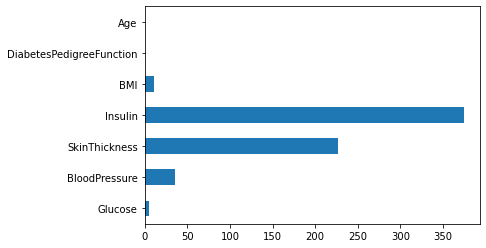

In [18]:
cols_null.sum().plot.barh()

Age와 DiabetesPedigreeFunction는 0인 데이터가 없고, 나머지는 0인 데이터가 많았으며, 인슐린이나 피부두께는 200 샘플 이상의 데이터가 결측치로 되어있습니다. 결측치를 채워봅시다.

In [19]:
cols['Pregnancies'] = dataset['Pregnancies']
cols['Outcome'] = dataset['Outcome']
dataset = cols

In [20]:
dataset.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,NaN,33.6,0.627,50,6,1
1,85.0,66.0,29.0,NaN,26.6,0.351,31,1,0
2,183.0,64.0,NaN,NaN,23.3,0.672,32,8,1


<br>

#### 7.5. 데이터 분석

In [21]:
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
dataset["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

데이터은 65 : 35라는 분포를 가지고 있습니다. 정상 환자의 비율이 65%, 당뇨 환자의 비율이 35% 입니다.

In [23]:
dataset_po = dataset.groupby(["Pregnancies"], as_index=False)["Outcome"].mean()
dataset_po

,Pregnancies,Outcome
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


임신 횟수에 따른 당뇨병 발병 비율입니다. 

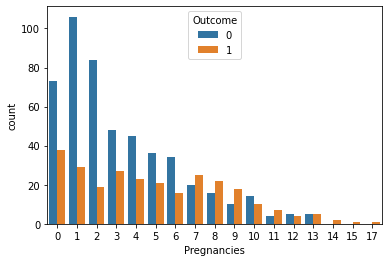

In [24]:
sns.countplot(data=dataset, x="Pregnancies", hue="Outcome")

In [25]:
dataset["Pregnancies_high"] = dataset["Pregnancies"] > 6
dataset[["Pregnancies", "Pregnancies_high"]]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


 임신횟수가 6보다 많다면 Pregnancies_high로 규정합니다.

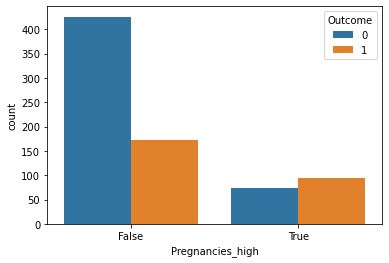

In [26]:
sns.countplot(data=dataset, x="Pregnancies_high", hue="Outcome")

위 그림을 보면 임신횟수가 높으면 당뇨 발병률이 높아지는 것을 알 수 있습니다. 따라서 임신횟수를 High(1)와 Low(0)로 비닝(Binning)하겠습니다. 

In [27]:
dataset["Pregnancies"] = dataset["Pregnancies_high"].map({True:1, False:0})
dataset = dataset.drop("Pregnancies_high", axis=1)

계속해서 feature engineering을 이어가도록 하겠습니다. 이번엔 피부의 두께와 당뇨병과의 관계를 보도록 하겠습니다. 우선  피부의 두께는 매우 많은 결측치를 가지고 있는 데이터였습니다. 따라서 결측치를 없애기 위해서  피부의 두께와 다른 데이터 간의 상관계수 분석을 수행해보겠습니다.

In [28]:
dataset.SkinThickness.isnull().sum()
# 227개의 결측치 보유

227

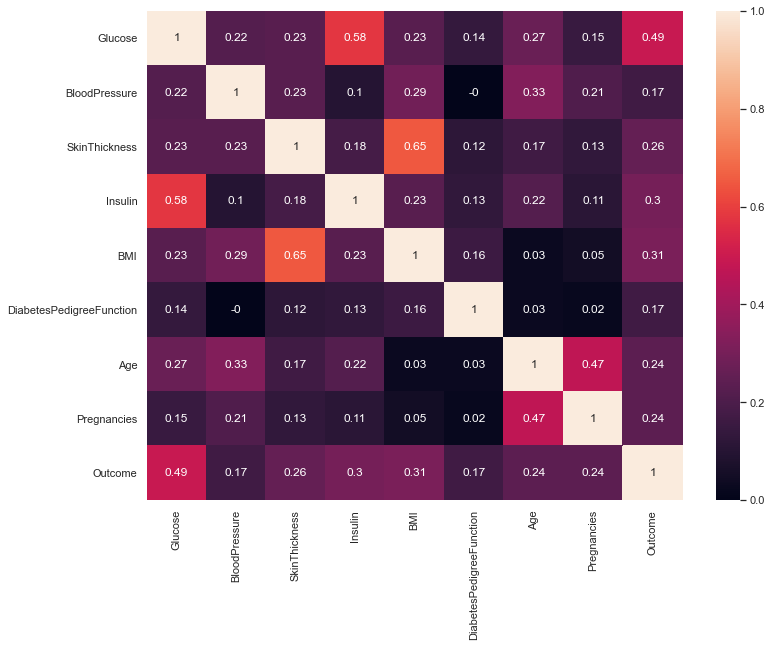

In [29]:
import seaborn as sns 

correlation_matrix = dataset.corr().round(2)

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True) # 상관계수 분석

피부의 두께는 BMI와 상당히 밀접한 관계가 있는 것을 알 수 있습니다. 따라서 BMI 데이터를 관찰해보겠습니다.

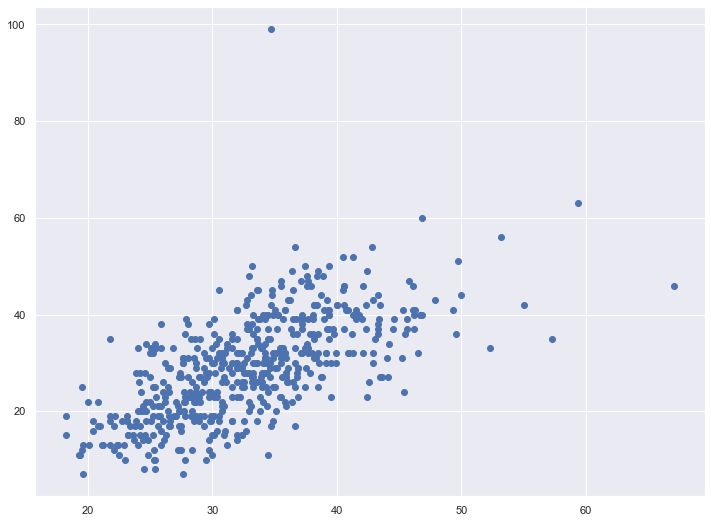

In [30]:
plt.scatter(dataset['BMI'], dataset['SkinThickness'])

실제로 이들간에 비례관계가 있는 것으로 확인되었습니다. 우선 BMI의 결측치를 먼저 채우도록 하겠습니다. 

In [31]:
dataset.BMI.isnull().sum()
# 11개의 결측치 보유

11

BMI 결측치는 수가 적은 편이기 때문에 간단하게 평균으로 채웁니다.

In [32]:
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mean())

그리고 두 속성이 양의 상관관계를 가진다는 것을 이용해 skin / BMI 값을 계산해놓고, skin에 결측치가 있으면 skin / BMI * BMI를 계산해서 가상의 skin값을 만들어냅니다. 이는 선형회귀를 진행하는 것과 동일한 효과를 기대할 수 있습니다.

In [33]:
fill_skin = []
mean_skin_bmi = (dataset['SkinThickness'] / dataset['BMI']).mean()

for i, row in dataset.iterrows():
    
    if np.isnan(row['SkinThickness']) :
        row['SkinThickness'] = mean_skin_bmi * row['BMI']
    
    fill_skin.append(row)

In [34]:
dataset = pd.DataFrame(fill_skin)

In [35]:
dataset.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
Outcome                       0
dtype: int64

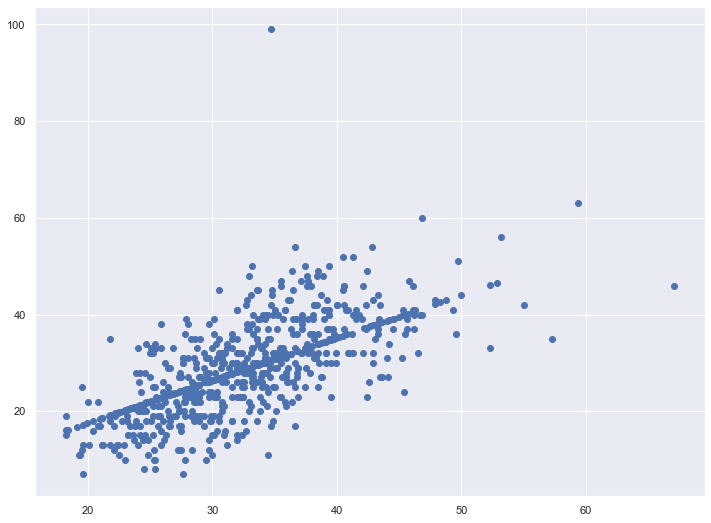

In [36]:
plt.scatter(dataset['BMI'], dataset['SkinThickness'])

빈 데이터를 위와 같이 채웠습니다. BMI와 SkinThickness의 결측치 문제를 해결하고, 다른 결측치들을 메꾸기 위해 상관계수 행렬을 다시 출력합니다.

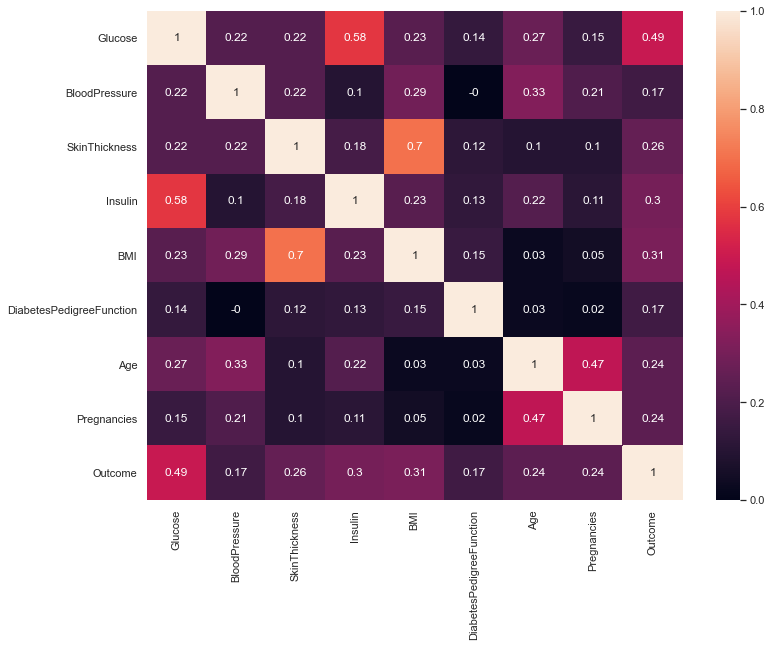

In [37]:
import seaborn as sns 

correlation_matrix = dataset.corr().round(2)

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True) # 상관계수 분석

글루코스와 인슐린의 상관관계를 확인합니다.

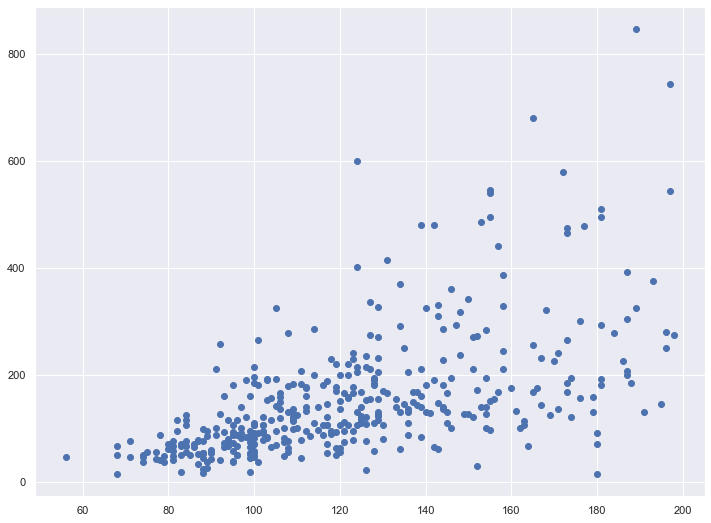

In [38]:
plt.scatter(dataset['Glucose'], dataset['Insulin'])

약한 양의 상관관계가 보이는데, 선형보다는 지수적인 증가꼴을 보입니다. 위와 마찬가지로 결측치가 적은 글루코스를 이용해 인슐린의 결측치를 채웁니다. 이번에는 글루코스를 제곱해서 polynomial regression의 효과를 기대할 수 있게 구현합니다.

In [39]:
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())

In [40]:
fill_ins = []


for i, row in dataset.iterrows():
    
    if np.isnan(row['Insulin']) :
        row['Insulin'] = (row['Glucose'] * row['Glucose']) / (100) 
        # x^2의 그래프를 그려서 지수적인 증가꼴 따라하기
    
    fill_ins.append(row)

In [41]:
dataset = pd.DataFrame(fill_ins)

In [42]:
dataset.isnull().sum()

Glucose                      0
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Pregnancies                  0
Outcome                      0
dtype: int64

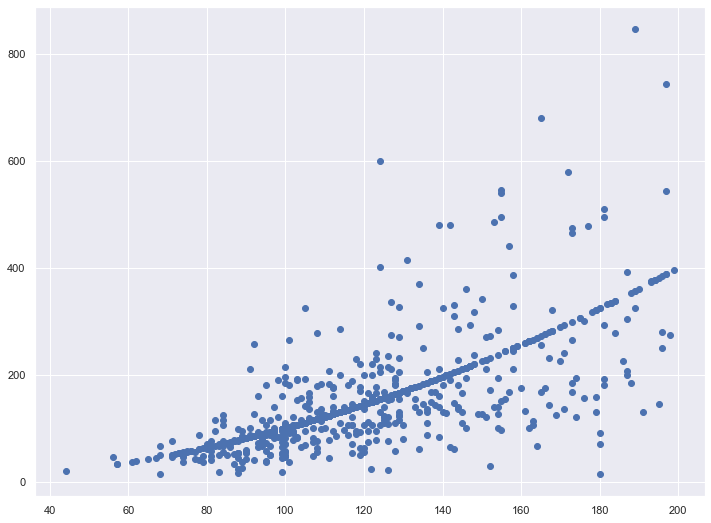

In [43]:
plt.scatter(dataset['Glucose'], dataset['Insulin'])

대부분의 결측치 문제가 해결되었습니다. 마지막으로 혈압을 채워줍니다. 여러번 실험결과 혈압은 평균값보다 0으로 채우는 편이 성능이 좋았습니다.

In [44]:
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(0)

In [45]:
dataset.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [46]:
np.array(old_list).mean(axis=0)

array([0.75324675, 0.75909091, 0.75974026, 0.75974026, 0.76428571])

In [47]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


new_list = []
for i in range(max_random_state):
    svm = SVC(random_state=i)
    rf = RandomForestClassifier(random_state=i)
    gb = GradientBoostingClassifier(random_state=i)
    xgb = XGBClassifier(random_state=i)
    vt = VotingClassifier(estimators=[('svm', svm), ('rf', rf), ('gb', gb), ('xgb', xgb)])

    result = Trainer(dataset).fit_iter(svm, rf, gb, xgb, vt)
    print(result)
    new_list.append(result)

[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7467532467532467, 0.7792207792207793]
[0.7532467532467533, 0.7597402597402597, 0.7597402597402597, 0.7467532467532467, 0.7727272727272727]
[0.7532467532467533, 0.7597402597402597, 0.7662337662337663, 0.7467532467532467, 0.7857142857142857]
[0.7532467532467533, 0.7857142857142857, 0.7597402597402597, 0.7467532467532467, 0.7857142857142857]
[0.7532467532467533, 0.7792207792207793, 0.7597402597402597, 0.7467532467532467, 0.7857142857142857]
[0.7532467532467533, 0.7727272727272727, 0.7597402597402597, 0.7467532467532467, 0.7792207792207793]
[0.7532467532467533, 0.7467532467532467, 0.7597402597402597, 0.7467532467532467, 0.7792207792207793]
[0.7532467532467533, 0.7792207792207793, 0.7662337662337663, 0.7467532467532467, 0.7857142857142857]
[0.7532467532467533, 0.7662337662337663, 0.7597402597402597, 0.7467532467532467, 0.7857142857142857]
[0.7532467532467533, 0.7467532467532467, 0.7662337662337663, 0.7467532467532467, 0.77922077

In [49]:
np.array(new_list).mean(axis=0)

array([0.75324675, 0.76103896, 0.76277056, 0.74675325, 0.78181818])

In [48]:
np.array(new_list).mean(axis=0) - np.array(old_list).mean(axis=0)

array([ 0.        ,  0.00194805,  0.0030303 , -0.01298701,  0.01753247])

피쳐 셀렉션 이후 랜덤포레스트는 0.2%, 그래디언트 부스팅은 0.3%가 증가했으며, XGBoost는 오히려 1.2% 감소하였고, 앙상블 모델은 거의 2% 가까이 올랐습니다. 이렇게 앙상블 트리모델과 종합 앙상블 모델은 이전에 배운 SVM보다도 좋은 성능을 보여주는 경우가 많습니다. 따라서 딥러닝이 아닌 머신러닝 기법으로 분류 작업을 수행하실때는 주로 저 위의 3가지 모델(SVM, Random Forest, Gradient Boosting등)과 앙상블 모델을 적극적으로 활용해보시길바랍니다. 

<br>

### 8. 의사결정트리의 장단점
- 장점 : 매우 직관적인 알고리즘으로 이해가 쉽습니다.
- 단점 : 너무 쉽게 오버피팅 될 수 있습니다.

<br>

### 9. 배깅(랜덤포레스트)의 장단점
- 장점 : 의사결정트리의 오버피팅 문제를 해결했습니다.
- 단점 : 딱히 없습니다.

<br>

### 10. 부스팅의 장단점
- 장점 : 의사결정트리가 못맞추는 문제를 더 잘 맞추게 학습하였습니다.
- 단점 : 어려운 문제가 계속 학습데이터에 들어가다보니, 어려운문제에 오버피팅 될 수도 있습니다.